In [1]:
import pandas as pd
import numpy as np

In [2]:
sales = pd.read_excel('sales_data.xlsx')
dates = pd.read_excel('date.xlsx')

In [3]:
print(sales.shape)
print(dates.shape)

(541909, 8)
(541909, 6)


In [4]:
dates.columns

Index(['timestamp              ', 'date', 'day_name', 'day_of_month',
       'month_of_year', 'time_of_day(hh:mm:ss)'],
      dtype='object')

In [5]:
data = sales.join(dates)

In [6]:
data.columns

Index(['transaction id', 'product id', 'product description', 'quantity sold',
       'transaction timestamp', 'unit price', 'customer id',
       'transaction country', 'timestamp              ', 'date', 'day_name',
       'day_of_month', 'month_of_year', 'time_of_day(hh:mm:ss)'],
      dtype='object')

# Create a new column to know sold and cancellatons

In [7]:
def st(df):
    if df[0] == 'C':
        return 'cancelled'
    else:
        return 'Sold'

In [8]:
data['status'] = data['transaction id'].apply(lambda x: st(str(x)))

In [9]:
data[data['status']=='cancelled']['transaction id'].unique



<bound method Series.unique of 141       C536379
154       C536383
235       C536391
236       C536391
237       C536391
238       C536391
239       C536391
240       C536391
241       C536391
939       C536506
1441      C536543
1442      C536543
1973      C536548
1974      C536548
1975      C536548
1976      C536548
1977      C536548
1978      C536548
1979      C536548
1980      C536548
1981      C536548
1982      C536548
1983      C536548
1984      C536548
1985      C536548
1986      C536548
3170      C536606
3338      C536622
3410      C536625
3693      C536642
           ...   
538564    C581409
538565    C581409
538566    C581409
538567    C581409
540072    C581460
540073    C581460
540078    C581462
540079    C581462
540080    C581463
540081    C581464
540082    C581464
540083    C581465
540084    C581465
540085    C581465
540086    C581465
540087    C581466
540088    C581466
540089    C581466
540090    C581466
540091    C581466
540141    C581468
540142    C581468
540176    C5814

# creating new column price to know total price 

In [12]:
data['price'] = data['unit price']*data['quantity sold']

In [13]:
data['price'].head()

0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: price, dtype: float64

In [67]:
data[['price','customer id','transaction id']].groupby(['transaction id','customer id'])['price'].sum().max()

168469.6

In [14]:
data.shape

(541909, 16)

In [15]:
data['status'].value_counts()

Sold         532621
cancelled      9288
Name: status, dtype: int64

In [16]:
dataset = data[data['status']=='Sold']
dataset.shape

(532621, 16)

5231


C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


                         0
transaction id           0
product id               0
product description      0
quantity sold            0
transaction timestamp    0
unit price               0
customer id              0
transaction country      0
timestamp                0
date                     0
day_name                 0
day_of_month             0
month_of_year            0
time_of_day(hh:mm:ss)    0
status                   0
price                    0
4339


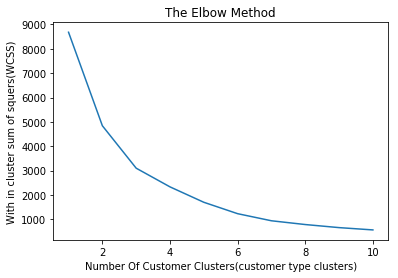

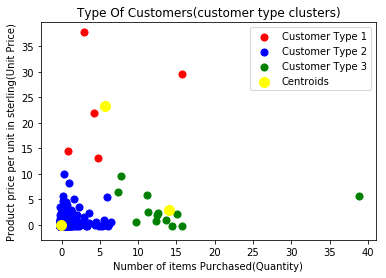

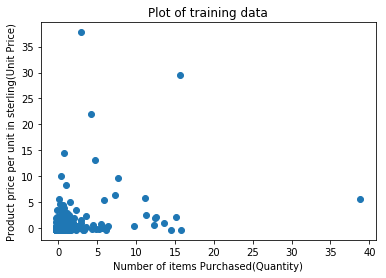

In [136]:

print (dataset.duplicated().sum())    
dataset.drop_duplicates(inplace = True)
dataset.shape   #(536641, 8)
#Removing missing values based on  CustomerID.
dataset.dropna(axis = 0, subset =['customer id'], inplace = True)
dataset.shape #(406829, 8)
print (pd.DataFrame(dataset.isnull().sum()))    #Checking for any null entries column wise, We can see that there are 0 null entries
#Removing Cancelled orders
#dataset = dataset[(dataset['transaction id']).apply(lambda x:( 'C' not in x))]
dataset.shape    #(392732, 8)
df_customerid_groups=dataset.groupby("customer id")
print (len((df_customerid_groups.groups))) #length of dictionary - 4339

df_cluster=pd.DataFrame(columns=['quantity sold','unit price','customer id'])
count=0
for k,v in (df_customerid_groups):
    df_cluster.loc[count] = [(v['quantity sold'].sum()), v['unit price'].sum(), k]
    count+=1
df_cluster.shape  #(4339, 3)
# Applying K-Means Clustering Algorithm
# We use only 'Quantity','UnitPrice' columns to cluser 
X = df_cluster.iloc[:, [0, 1]].values

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X= sc_X.fit_transform(X)
#Using the Elbow method to find the optical number of clusters
from sklearn.cluster import KMeans
wcss = [] #With in cluster sum of squers(Inertia)

for i in range(1,11): #From 2-10 doing multiple random initializations can make a huge difference to find a better local optima
    kmeans = KMeans(n_clusters = i, init ='k-means++',max_iter=300,n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11) , wcss)
plt.title('The Elbow Method')
plt.xlabel('Number Of Customer Clusters(customer type clusters)')
plt.ylabel('With in cluster sum of squers(WCSS)')
plt.show()

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Customer Type 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Customer Type 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Customer Type 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Type Of Customers(customer type clusters)')
plt.xlabel('Number of items Purchased(Quantity)')
plt.ylabel('Product price per unit in sterling(Unit Price)')
plt.legend()
plt.show()

x=[];y=[]
for i in range(4339):
    x.append(X[i][0])
    y.append(X[i][1])
plt.scatter(x,y)
plt.title('Plot of training data')
plt.xlabel('Number of items Purchased(Quantity)')
plt.ylabel('Product price per unit in sterling(Unit Price)')
plt.show()


In [137]:
data.columns

Index(['transaction id', 'product id', 'product description', 'quantity sold',
       'transaction timestamp', 'unit price', 'customer id',
       'transaction country', 'timestamp              ', 'date', 'day_name',
       'day_of_month', 'month_of_year', 'time_of_day(hh:mm:ss)', 'status',
       'price'],
      dtype='object')

In [17]:
data['status'].value_counts()

Sold         532621
cancelled      9288
Name: status, dtype: int64

In [18]:
data.shape

(541909, 16)

In [19]:
(9288/541909)*100

1.7139409015166756

# Month wise trends

In [22]:
from matplotlib import pyplot as plt

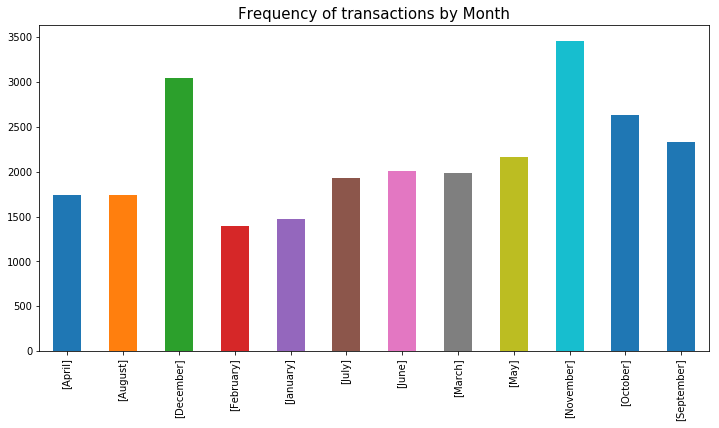

In [27]:
plt.figure(figsize=(12,6))
plt.title("Frequency of transactions by Month", fontsize=15)
transaction = data.groupby(['transaction id'])['month_of_year'].unique()
transaction.value_counts().sort_index().plot('bar')
plt.show()

# Day Wise

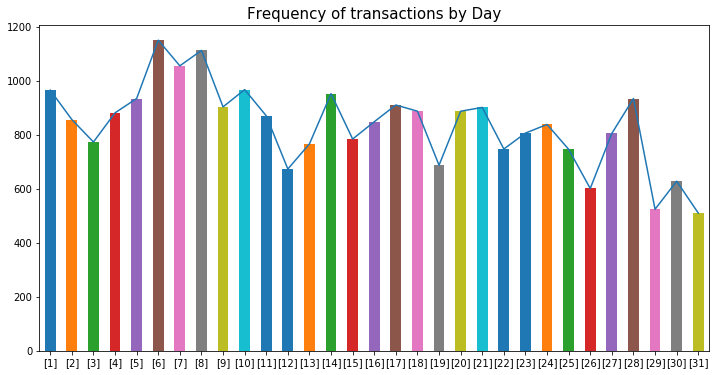

In [30]:
plt.figure(figsize=(12,6))
plt.title("Frequency of transactions by Day", fontsize=15)
t1 = data.groupby(['transaction id'])['day_of_month'].unique()
t1.value_counts().sort_index().plot('bar')
t1.value_counts().sort_index().plot('line')

# WeekDay Wise

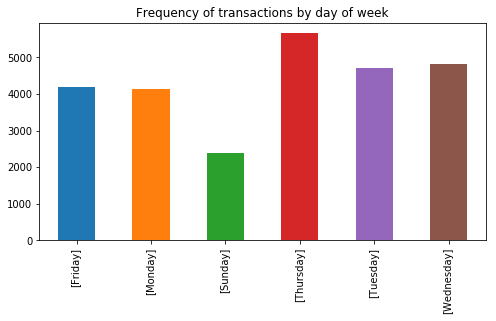

In [33]:
plt.figure(figsize=(8,4))
plt.title("Frequency of transactions by day of week", fontsize=12)
t2 = data.groupby(['transaction id'])['day_name'].unique()
t2.value_counts().sort_index().plot.bar()

# Hour wise

In [34]:
data['Hour'] = sales['transaction timestamp'].dt.hour

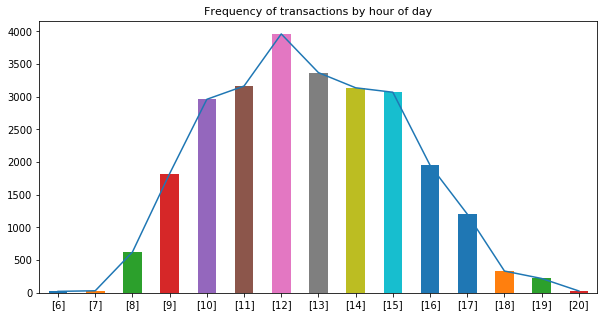

In [37]:
plt.figure(figsize=(10,5))
plt.title("Frequency of transactions by hour of day", fontsize=11)
t3 = data.groupby(['transaction id'])['Hour'].unique()
(t3.value_counts()).iloc[0:-1].sort_index().plot.bar()
(t3.value_counts()).iloc[0:-1].sort_index().plot.line()

In [39]:
#first order vs reorder

In [38]:
df_sort = data.sort_values(['customer id', 'product id', 'transaction timestamp'])
df_sort_shift1 = df_sort.shift(1)
df_sort_reorder = df_sort.copy()
df_sort_reorder['reorder'] = np.where(df_sort['product id'] == df_sort_shift1['product id'], 1,0)
df_sort_reorder.head(5)

,transaction id,product id,product description,quantity sold,transaction timestamp,unit price,customer id,transaction country,timestamp,date,day_name,day_of_month,month_of_year,time_of_day(hh:mm:ss),status,price,Hour,reorder
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011-01-18 10:01:00,2011-01-18,Tuesday,18,January,10:01:00,Sold,77183.6,10,0
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,2011-01-18 10:17:00,2011-01-18,Tuesday,18,January,10:17:00,cancelled,-77183.6,10,1
148306,549222,16008,SMALL FOLDING SCISSOR(POINTED EDGE),24,2011-04-07 10:43:00,0.25,12347.0,Iceland,2011-04-07 10:43:00,2011-04-07,Thursday,7,April,10:43:00,Sold,6.0,10,0
220583,556201,17021,NAMASTE SWAGAT INCENSE,36,2011-06-09 13:01:00,0.30,12347.0,Iceland,2011-06-09 13:01:00,2011-06-09,Thursday,9,June,13:01:00,Sold,10.8,13,0
148289,549222,20665,RED RETROSPOT PURSE,6,2011-04-07 10:43:00,2.95,12347.0,Iceland,2011-04-07 10:43:00,2011-04-07,Thursday,7,April,10:43:00,Sold,17.7,10,0


In [45]:
pd.DataFrame((df_sort_reorder.groupby(['product description'])['reorder'].sum())).sort_values('reorder', ascending = False).head(10)

,reorder
product description,
JUMBO BAG RED RETROSPOT,1522
WHITE HANGING HEART T-LIGHT HOLDER,1509
REGENCY CAKESTAND 3 TIER,1312
LUNCH BAG RED RETROSPOT,1106
PARTY BUNTING,1018
LUNCH BAG BLACK SKULL.,891
JUMBO STORAGE BAG SUKI,879
JUMBO BAG PINK POLKADOT,878
POSTAGE,872


# sales by month

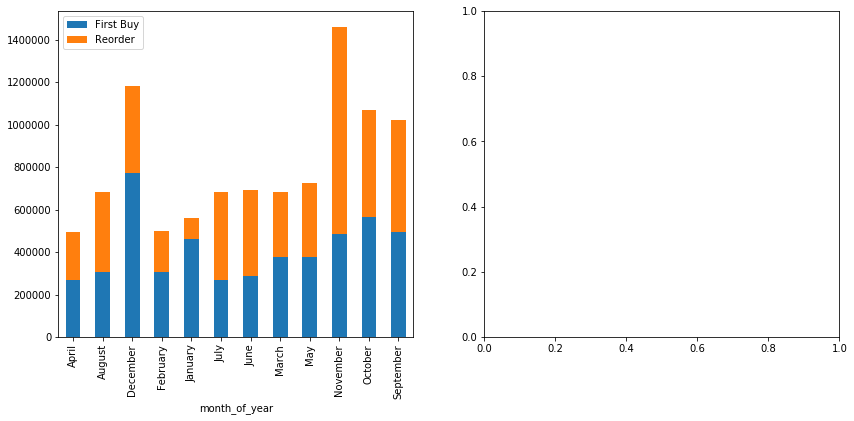

In [51]:
notreorder = (df_sort_reorder[df_sort_reorder['reorder'] == 0 ].groupby(['month_of_year'])['price'].sum())
reorder = (df_sort_reorder[df_sort_reorder['reorder'] == 1 ].groupby(['month_of_year'])['price'].sum())

yearmonth = pd.DataFrame([notreorder , reorder], index=['First Buy', 'Reorder']).transpose()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

yearmonth.plot.bar(stacked=True, ax=axes[0])
